<a href="https://colab.research.google.com/github/prayag1740/Machine-Learning/blob/main/HandlingMissingData4_RandomSampleImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/Copy of titanic_train.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [8]:
## age has missing values

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [12]:
# filling NA values with random values from current age
X_train['Age_imputed'][X_train['Age'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [11]:
X_train.sample(10)

,Age,Fare,Age_imputed
42,NaN,7.8958,16.0
317,54.0,14.0000,54.0
28,NaN,7.8792,17.0
511,NaN,8.0500,35.0
536,45.0,26.5500,45.0
684,60.0,39.0000,60.0
382,32.0,7.9250,32.0
708,22.0,151.5500,22.0
131,20.0,7.0500,20.0
189,36.0,7.8958,36.0


<ipython-input-14-fb139dfc204c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], hist=False, label='Age')
<ipython-input-14-fb139dfc204c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], hist=False, label='Age_imputed')


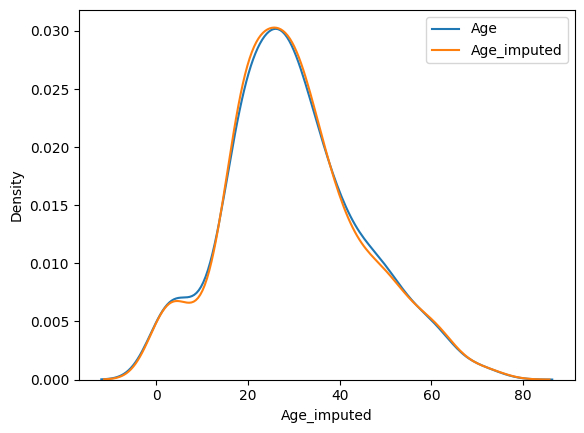

In [14]:
sns.distplot(X_train['Age'], hist=False, label='Age')
sns.distplot(X_train['Age_imputed'], hist=False, label='Age_imputed')
plt.legend()
plt.show()

We can clearly see the distribution before and after the imputation is same

In [15]:
print(f"variance before imputation: {X_train['Age'].var()}")
print(f"variance after imputation: {X_train['Age_imputed'].var()}")

variance before imputation: 213.7110908441599
variance after imputation: 212.26910965407166


In [17]:
X_train[['Age', 'Fare', 'Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,213.711091,75.455748,213.711091
Fare,75.455748,2010.098122,82.214379
Age_imputed,213.711091,82.214379,212.269110


<Axes: >

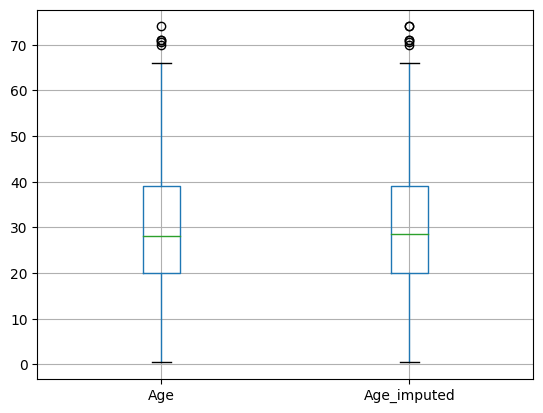

In [18]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
# We should always set the random state as constant for a particular fare, so that random values be not generated
sampled_val = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'])).values

In [19]:
house = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/housePricePredictionTrain.csv', usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
house.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
house.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [23]:
X = house.drop(columns=['SalePrice'])
y = house['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values



In [27]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

KeyError: 'SalePrice'